In [1]:
import numpy as np #imports numpy package into memory and give it a nickname as np
import pandas as pd #imports pandas package into memory and give it a nickname as pd
import matplotlib.pyplot as plt #imports matplot library to show and use some plot function of it for further analysis.
import seaborn as sns 
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("breastCancer.csv", sep=',',error_bad_lines=False, decimal='.', encoding = 'unicode_escape')
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
data[data['bare_nucleoli'] =='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [4]:
df=data.replace('?',np.nan) #replace ? with nan

In [5]:
df.median() #checking median of that row

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [6]:
df= df.fillna(df.median()) #replacing nan with the median of that row i.e.. 1

In [7]:
df.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [8]:
 df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64') #converting the type object to int64

In [9]:
df.dtypes #All int64

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [10]:
df= df.drop('id',axis=1)

In [11]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


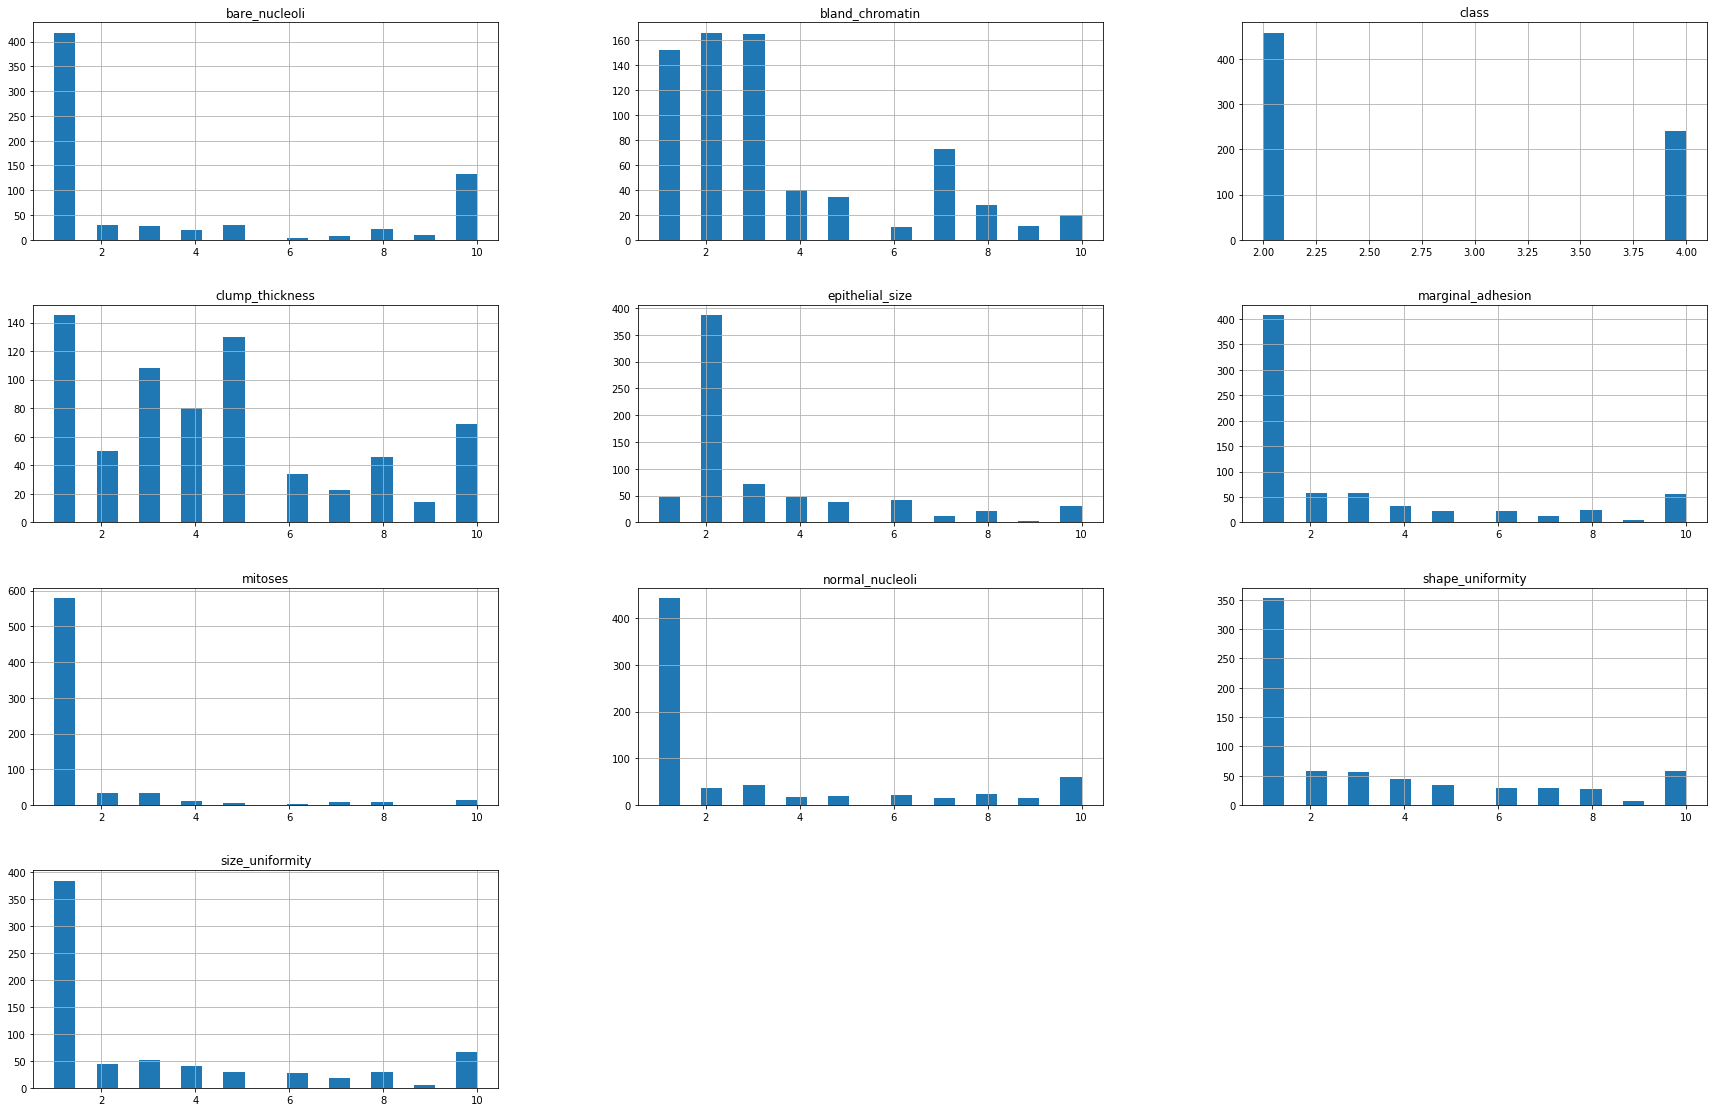

In [12]:
df.hist(bins=20,figsize=(30,30),layout=(6,3));

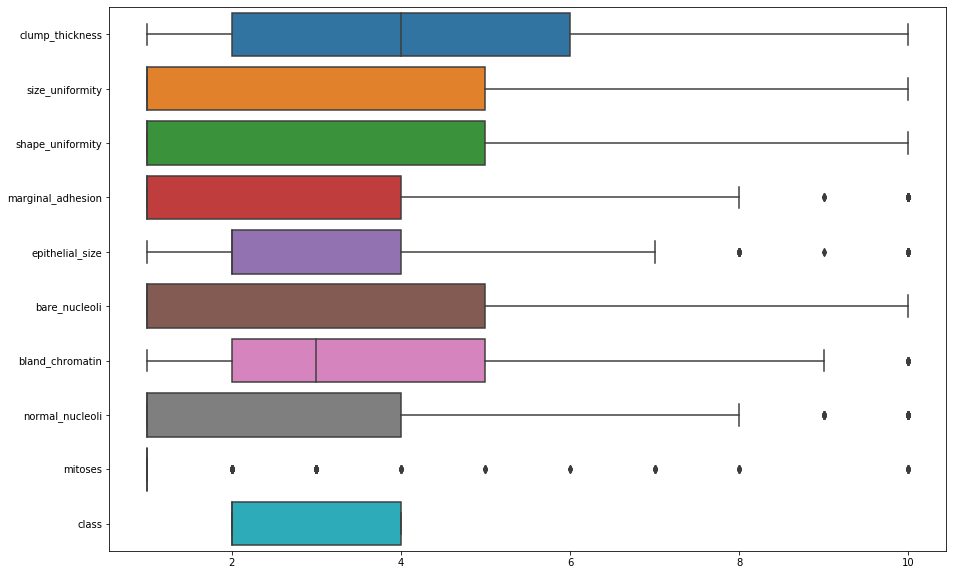

In [13]:
plt.figure(figsize=(15,10)) # we can see that the values majorly lies under 5.
sns.boxplot(data=df,orient='h')

In [14]:
df.corr() #size uniformity and shape uniformity are highly positive correlated.

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


Text(0.5, 1, 'correlation between different attribute')

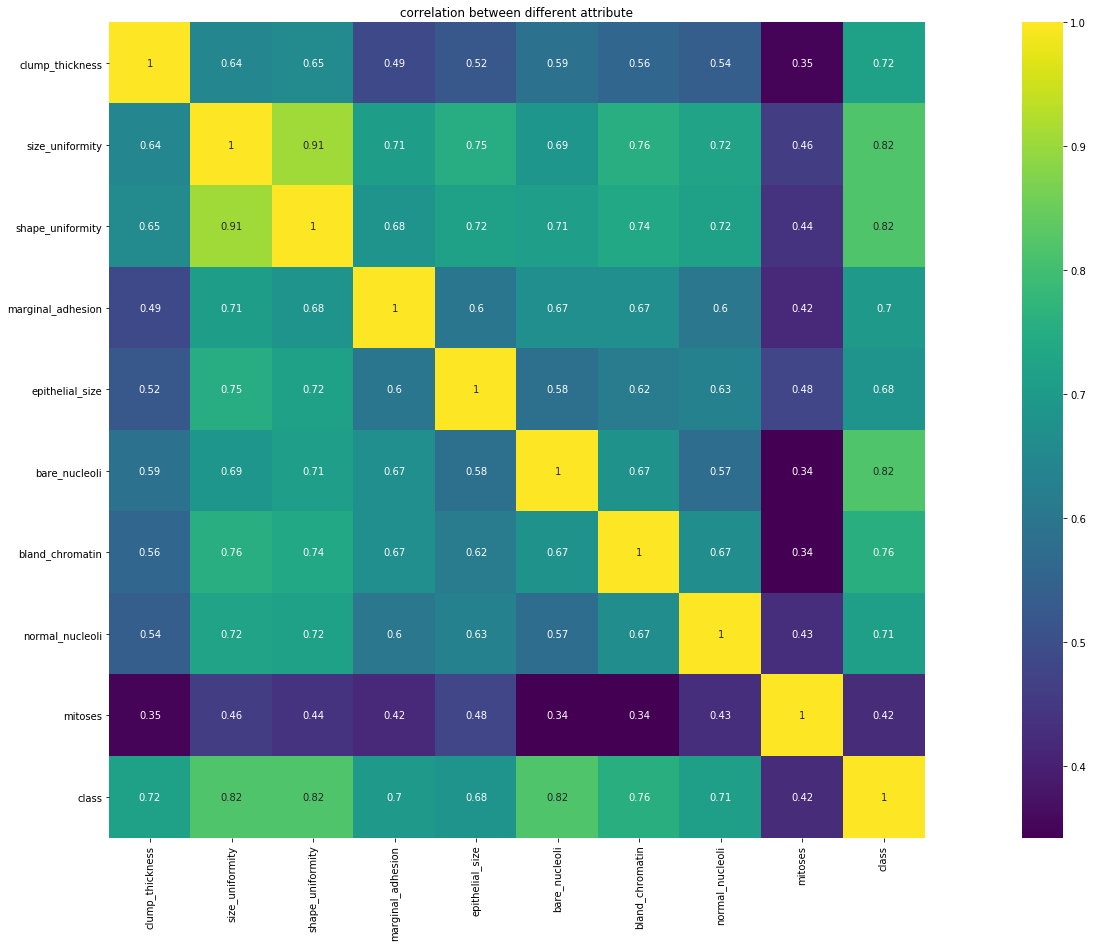

In [15]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis') #through heatmap we can visualize the correlation easily
plt.title('correlation between different attribute')

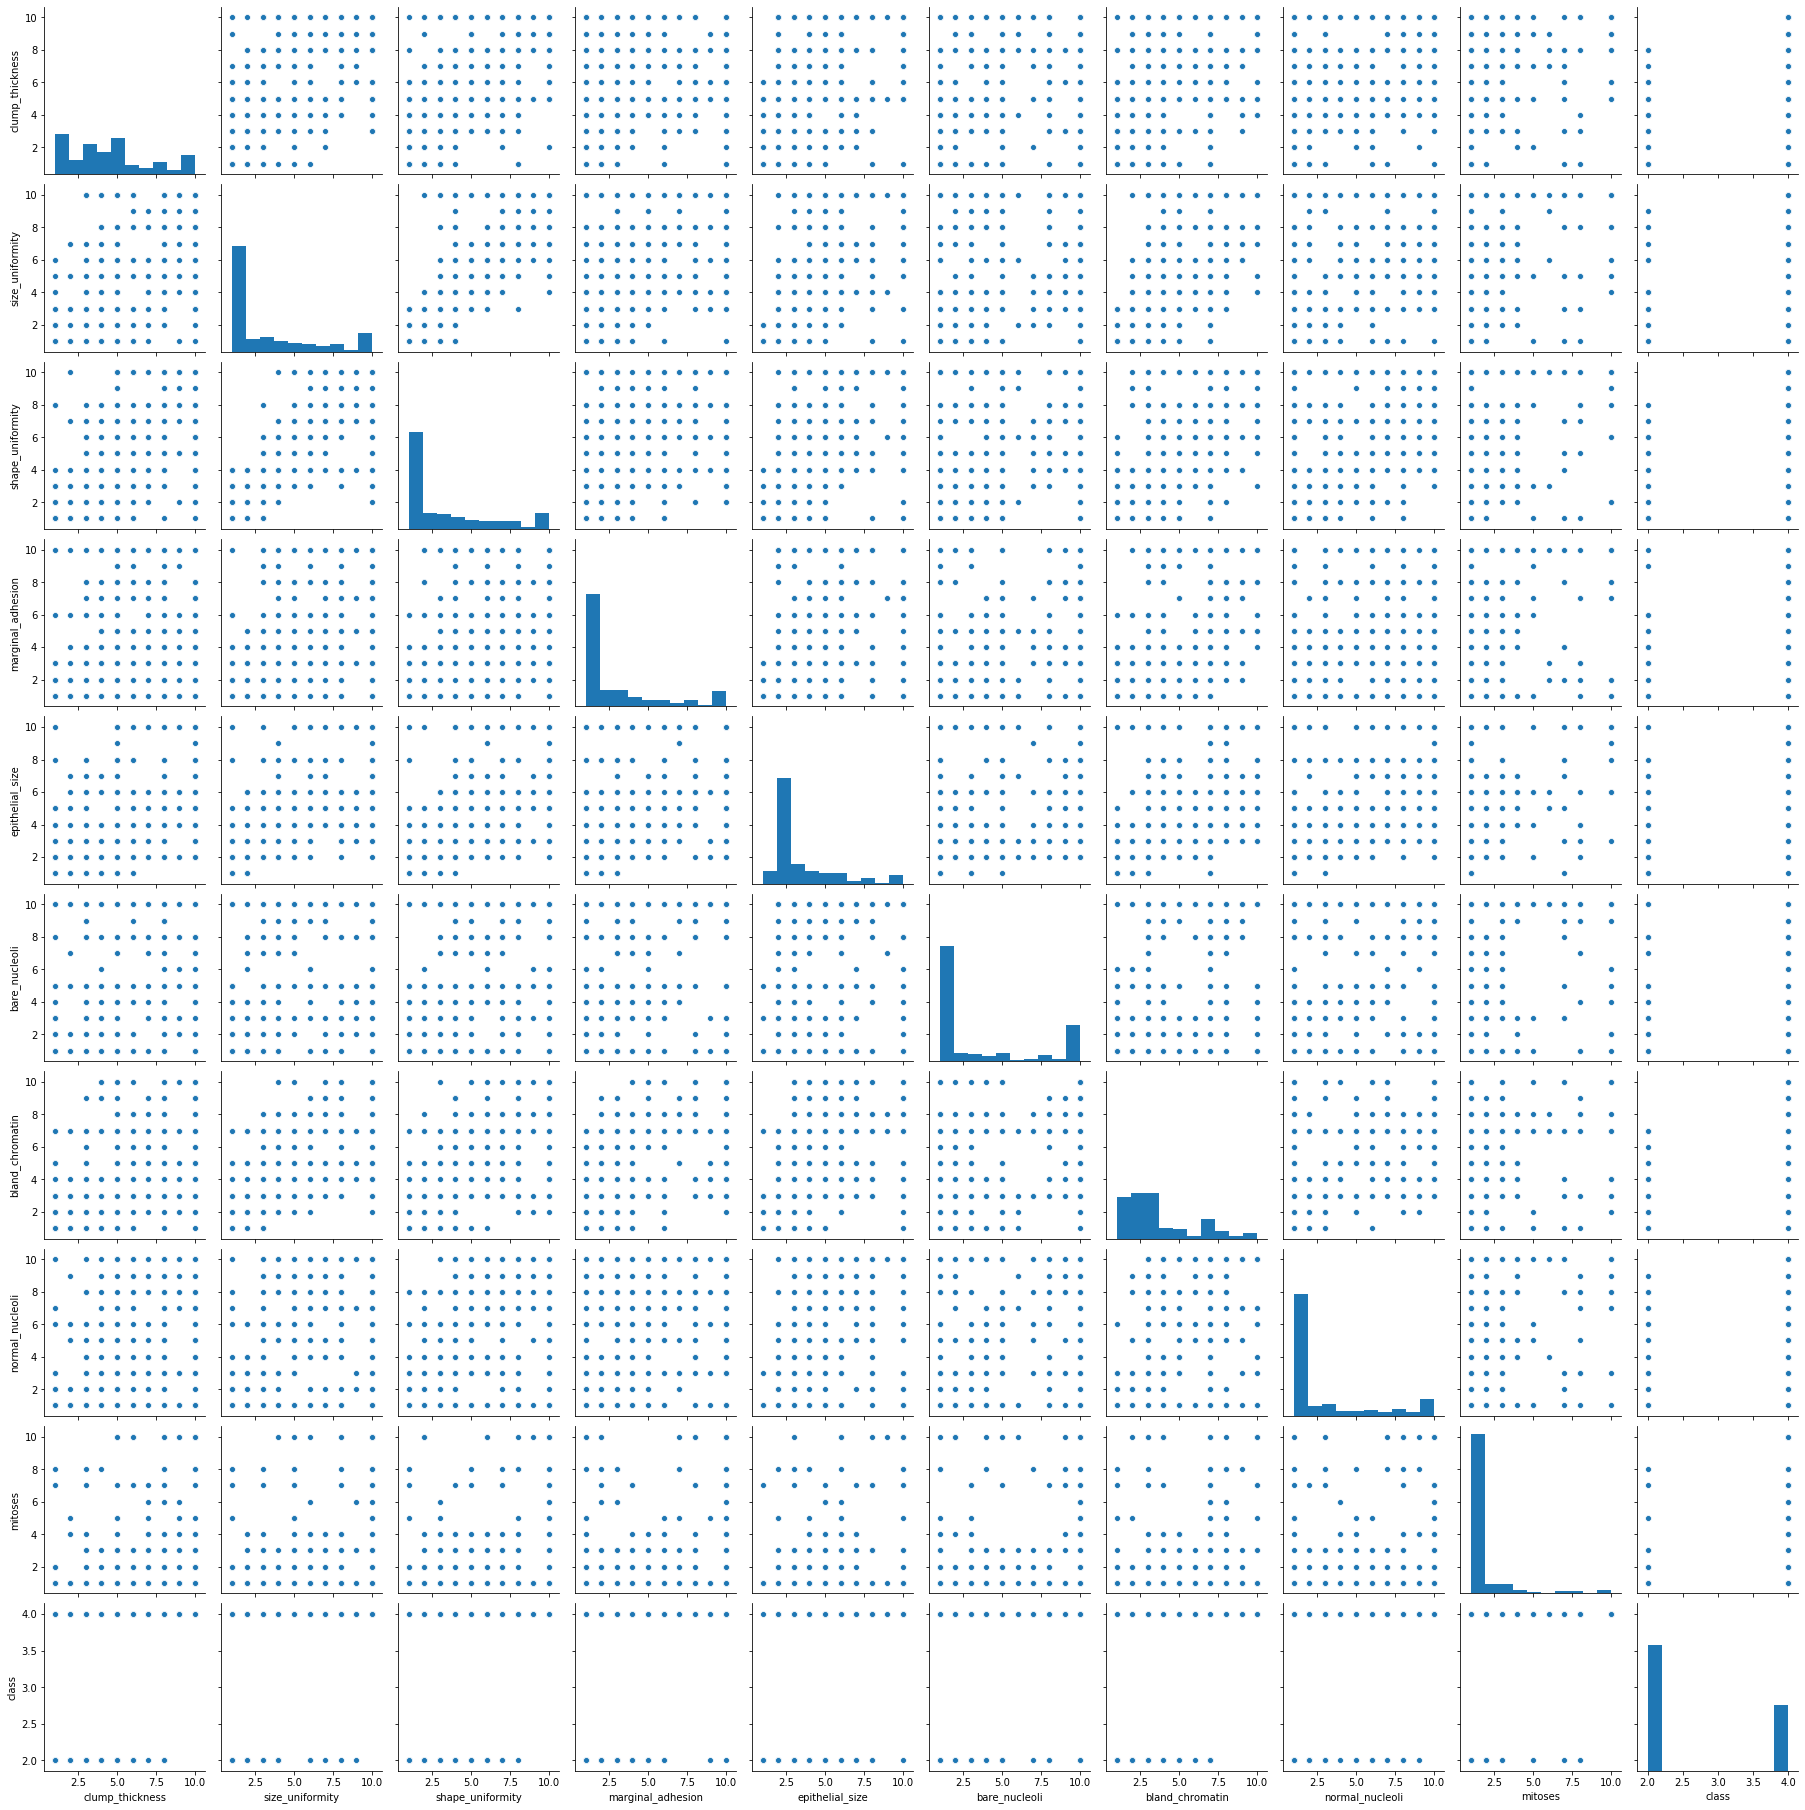

In [16]:
sns.pairplot(df,diag_kind='hist')

In [17]:
X=df.drop('class',axis=1)
y=df['class']

from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state = 1)



## KNN Technique First.


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5, weights='distance')
knn.fit(X_train,y_train) #Training

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [19]:
predicted_1=knn.predict(X_test) #Testing on unseen data
from scipy.stats import zscore
print('K Nearest Neighbour is predicting at {0:.2g}%'.format(knn.score(X_test,y_test)*100))

K Nearest Neighbour is predicting at 97%


## Support Vector Machine

In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train) #Training


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
predicted_2=svc.predict(X_test) #Testing on unseen data
print('SVM is predicting at {0:.2g}%'.format(svc.score(X_test,y_test)*100))

SVM is predicting at 98%


## Comparission Between Both

In [22]:
from sklearn.metrics import classification_report 
print('KNN Classification Report')
print('***'*10)
print(classification_report(y_test,predicted_1))  

KNN Classification Report
******************************
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [23]:
print('SVC Classification Report')
print('***'*10)
print(classification_report(y_test,predicted_2))

SVC Classification Report
******************************
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [24]:
from sklearn.metrics import confusion_matrix 
print('Confusion Matrix for KNN') 
cm=confusion_matrix(y_test,predicted_1,labels=[2,4])
print(cm)

Confusion Matrix for KNN
[[136   1]
 [  5  68]]


In [25]:
print('Confusion Matrix for SVC') 
cm=confusion_matrix(y_test,predicted_2,labels=[2,4])
print(cm)

Confusion Matrix for SVC
[[135   2]
 [  2  71]]


### Conclusion :- We will move ahead with our SVM model in production and going to recommend that to Dr. William and rest of the concerns in the hospital healthcare system. So if the new data comes in, they dont have to do this manually. They can use our SVM Machine learning algorithm to make predictions